2023-S1-41 Project: Electricity Demand Forecasting Using Machine Learning

Jin He, Ting Zhang, Zhongyuan Zhang



content links

1. Introduction

2. Literture Review

3. Reserch Problem

4. Dataset

In [1]:
# Library 
import ipykernel
ipykernel.__version__
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#. import statsmodels.api as 

import plotly.express as px

"""from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf"""

'from statsmodels.graphics.tsaplots import plot_acf\nfrom statsmodels.graphics.tsaplots import plot_pacf'

4.1  dataset
The dataset covers 2016 days between 1 January 2015 and 6 October 2020. During some intraday intervals RRP was negative, so that energy producers were paying consumers rather than wise versa.

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/jhe117/9785-23-08/Project-Report/complete_dataset.csv')

4.2  Dataset Description
The dataset covers 2016 days between 1 January 2015 and 6 October 2020. During some intraday intervals RRP was negative, so that energy producers were paying consumers rather than wise versa. Below is a brief description fo the data:

date : datetime, the date of the recording
demand : float, a total daily electricity demand in MWh
RRP : float, a recommended retail price in AUD$ / MWh
demand_pos_RRP : float, a total daily demand at positive RRP in MWh
RRP_positive : float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD$ / MWh
demand_neg_RRP : float, an total daily demand at negative RRP in MWh
RRP_negative : float, an average negative RRP, weighted by the corresponding intraday demand in AUD$ / MWh
frac_at_neg_RRP : float, a fraction of the day when the demand was traded at negative RRP
min_temperature : float, minimum temperature during the day in Celsius
max_temperature : float, maximum temperature during the day in Celsius
solar_exposure : float, total daily sunlight energy in MJ/m^2
rainfall : float, daily rainfall in mm
school_day : boolean, if students were at school on that day
holiday : boolean, if the day was a state or national holiday

In [3]:
# Dataset information
# print(f"Number of rows: {len(df)}, Number of columns: {len(df.columns)}")
print(df.head(3))
print(df.tail(3))

         date     demand        RRP  demand_pos_RRP  RRP_positive  \
0  2015-01-01   99635.03  25.633696       97319.240     26.415953   
1  2015-01-02  129606.01  33.138988      121082.015     38.837661   
2  2015-01-03  142300.54  34.564855      142300.540     34.564855   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0        2315.790     -7.240000         0.020833             13.3   
1        8523.995    -47.809777         0.062500             15.4   
2           0.000      0.000000         0.000000             20.0   

   max_temperature  solar_exposure  rainfall school_day holiday  
0             26.9            23.6       0.0          N       Y  
1             38.8            26.8       0.0          N       N  
2             38.2            26.5       0.0          N       N  
            date      demand        RRP  demand_pos_RRP  RRP_positive  \
2103  2020-10-04   94081.565  25.008614       88580.995     26.571687   
2104  2020-10-05  113610.030  36.764

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [5]:
df.describe()

demand          RRP  demand_pos_RRP  RRP_positive  \
count    2106.000000  2106.000000     2106.000000   2106.000000   
mean   120035.476503    76.079554   119252.305055     76.553847   
std     13747.993761   130.246805    14818.631319    130.114184   
min     85094.375000    -6.076028    41988.240000     13.568986   
25%    109963.650000    38.707040   109246.250000     39.117361   
50%    119585.912500    66.596738   119148.082500     66.869058   
75%    130436.006250    95.075012   130119.477500     95.130181   
max    170653.840000  4549.645105   170653.840000   4549.645105   

       demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
count     2106.000000   2106.000000      2106.000000      2106.000000   
mean       783.171448     -2.686052         0.008547        11.582289   
std       3578.920686     19.485432         0.039963         4.313711   
min          0.000000   -342.220000         0.000000         0.600000   
25%          0.000000      0.000000         0.000000         8.500000   
50%          0.000000      0.000000         0.000000        11.300000   
75%          0.000000      0.000000         0.000000        14.600000   
max      57597.595000      0.000000         0.625000        28.000000   

       max_temperature  solar_exposure     rainfall  
count      2106.000000     2105.000000  2103.000000  
mean         20.413200       14.743373     1.505944  
std           6.288693        7.945527     4.307897  
min           9.000000        0.700000     0.000000  
25%          15.525000        8.200000     0.000000  
50%          19.100000       12.700000     0.000000  
75%          23.900000       20.700000     0.800000  
max          43.500000       33.300000    54.600000

4.3 Data Preprocessing

In [6]:
# Convert the date column to a pandas datetime format
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2105 non-null   float64       
 11  rainfall         2103 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

Due to the limited data available in October 2020 (only 6 days with data), the project opted to exclude this data from the analysis. This decision was made to improve the quality of the analysis and reduce the risk of drawing incorrect conclusions.  The final dataset used for analysis spanned from 01 January  2015 to 30 September 2020.

In [7]:
# Filter data to select range of interest
start_date = pd.Timestamp('2015-01-01') 
end_date = pd.Timestamp('2020-09-30')
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
df = df.loc[mask]
df = df.set_index('date')
df = df.sort_index()

In [8]:
print(f"Number of rows: {len(df)}, Number of columns: {len(df.columns)}")
print(df.head(3))
print(df.tail(3))

Number of rows: 2100, Number of columns: 13
               demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                             
2015-01-01   99635.03  25.633696       97319.240     26.415953   
2015-01-02  129606.01  33.138988      121082.015     38.837661   
2015-01-03  142300.54  34.564855      142300.540     34.564855   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-01-01        2315.790     -7.240000         0.020833             13.3   
2015-01-02        8523.995    -47.809777         0.062500             15.4   
2015-01-03           0.000      0.000000         0.000000             20.0   

            max_temperature  solar_exposure  rainfall school_day holiday  
date                                                                      
2015-01-01             26.9            23.6       0.0          N       Y  
2015-01-0

In [9]:
# Check for missing values in the DataFrame
print(df.isna().sum())

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64


In [10]:
# Find the rows that have missing values
rows_with_na = df[df.isna().any(axis=1)]
# Print the rows that have missing values
print(rows_with_na)

                demand        RRP  demand_pos_RRP  RRP_positive  \
date                                                              
2015-06-11  143465.445  37.481829      143465.445     37.481829   
2017-11-26  108717.875  83.114514      108717.875     83.114514   
2018-10-09  116449.310  99.000749      116449.310     99.000749   
2018-10-10  109551.080  73.539698      109551.080     73.539698   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
date                                                                         
2015-06-11             0.0           0.0              0.0              5.7   
2017-11-26             0.0           0.0              0.0             19.4   
2018-10-09             0.0           0.0              0.0             16.1   
2018-10-10             0.0           0.0              0.0             10.1   

            max_temperature  solar_exposure  rainfall school_day holiday  
date                                                 

The study assumes that missing values in the data are due to random variation or measurement error, rather than systematic errors or changes in the underlying data generation process. 
To address the missing values in the "solar_exposure" column, this project employs a strategy that aims to minimize bias or distortion in the overall dataset. Specifically, missing values are filled with the average value of the previous and subsequent days, which allows for representative values that reflect the overall pattern of the data to be used, while minimizing the impact of extreme values or outliers that could distort the analysis.
For the "rainfall" column, there are instances where NA is missing for two consecutive days. In such cases, the project uses a value of zero to replace the missing values, based on other weather factors from the same day.

In [11]:
# Replace the NA values with the average of the values from the day before and the day after
df['solar_exposure'] = df['solar_exposure'].fillna((df['solar_exposure'].shift(1) + df['solar_exposure'].shift(-1))/2)
# Replace missing values in the "rainfall" column with 0
df['rainfall'].fillna(0, inplace=True)

In [12]:
# Check again for missing values in the DataFrame
print(df.isna().sum())

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64


4.4  Dataset Exploratory

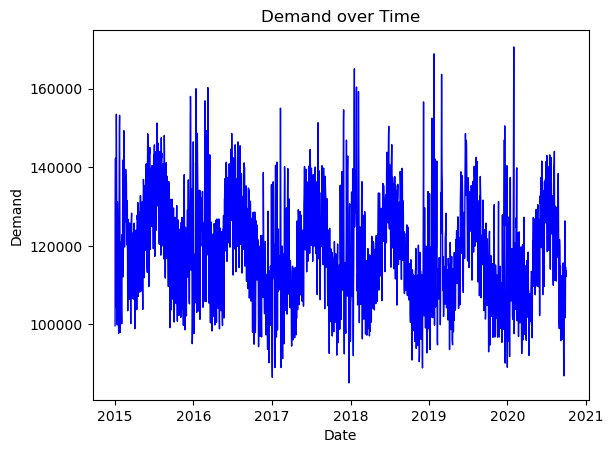

In [13]:
# create a line chart
plt.plot(df.index, df['demand'], color='blue', linewidth=1)

# add axis labels and title
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Demand over Time')

# display the chart
plt.show()


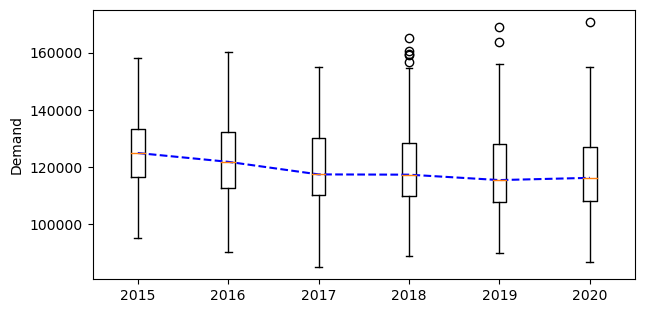

In [14]:
# Group the data by year and calculate the median demand
df['year'] = df.index.year
yearly_demand = df.groupby('year')['demand'].median()

# Create a boxplot for each year
fig, ax = plt.subplots(figsize=(7, 3.5))
for year in yearly_demand.index:
    data = df.loc[df['year'] == year, 'demand']
    ax.boxplot(data.values, positions=[year])

# Add a line for the trend of median value changes
ax.plot(yearly_demand.index, yearly_demand.values, color='blue', linestyle='--')

# Add median line
# df_quarterly.groupby('quarter')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

# Set the x- and y-axis labels
ax.set_xticks(yearly_demand.index)
ax.set_xticklabels(yearly_demand.index)
ax.set_ylabel('Demand')

# Show the plot
plt.show()

/var/folders/66/48n04c4s5hn0mjggwvm66qhh0000gn/T/ipykernel_17460/1855925761.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_quarterly = df.resample('Q').sum()


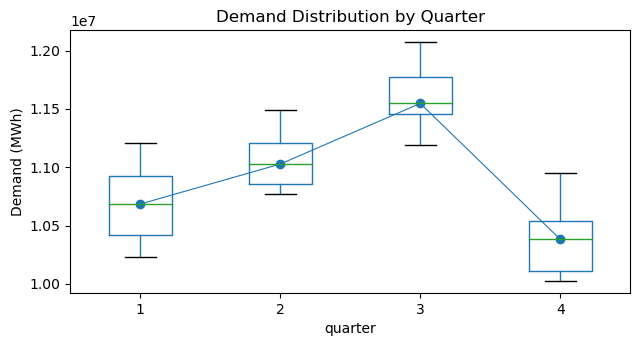

In [15]:
# Group the data by quarter and plot the box plot for each quarter
# Aggregate data by quarter
df_quarterly = df.resample('Q').sum()

# Create figure and axes
fig, ax = plt.subplots(figsize=(7, 3.5))

# Add boxplot for quarterly demand distribution
df_quarterly['quarter'] = df_quarterly.index.quarter
df_quarterly.boxplot(column='demand', by='quarter', ax=ax)

# Add median line
df_quarterly.groupby('quarter')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)

# Set axis labels and title
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Quarter')
fig.suptitle('')
plt.show()

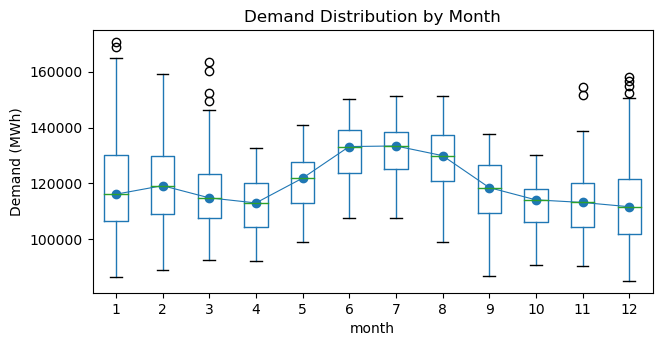

In [16]:
fig, ax = plt.subplots(figsize=(7, 3.5))
df['month'] = df.index.month
df.boxplot(column='demand', by='month', ax=ax,)
df.groupby('month')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Month')
fig.suptitle('');

Text(0.5, 0.98, '')

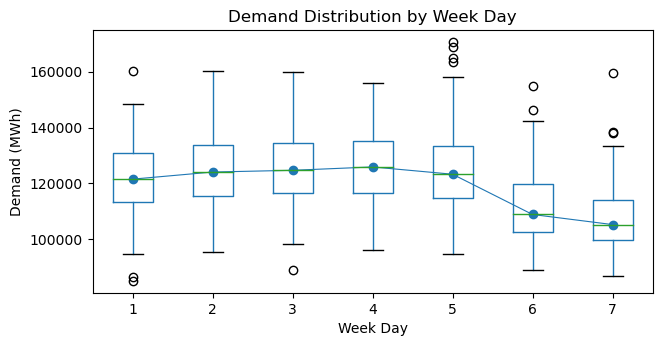

In [17]:
fig, ax = plt.subplots(figsize=(7, 3.5))
df['Week Day'] = df.index.day_of_week + 1
df.boxplot(column='demand', by='Week Day', ax=ax)
df.groupby('Week Day')['demand'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Demand (MWh)')
ax.set_title('Demand Distribution by Week Day')
fig.suptitle('')

Text(0, 0.5, 'Holiday')

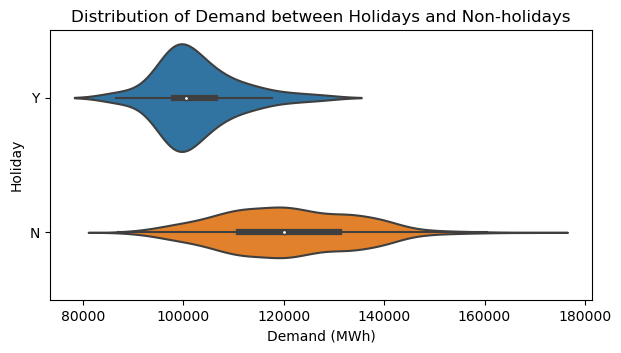

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'demand',
    y       = 'holiday',
    data    = df.assign(Holiday = df.holiday.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribution of Demand between Holidays and Non-holidays')
ax.set_xlabel('Demand (MWh)')
ax.set_ylabel('Holiday')

Text(0, 0.5, 'School Day')

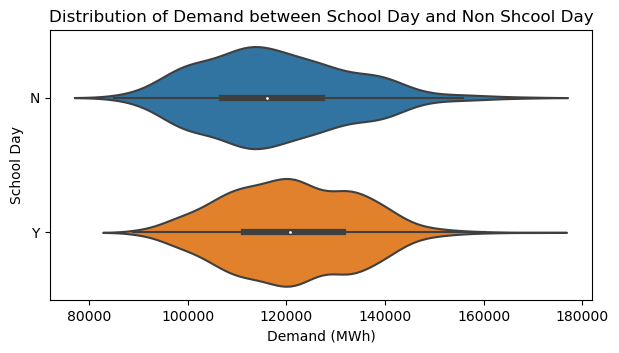

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.violinplot(
    x       = 'demand',
    y       = 'school_day',
    data    = df.assign(School_Day = df.school_day.astype(str)),
    palette = 'tab10',
    ax      = ax
)
ax.set_title('Distribution of Demand between School Day and Non Shcool Day')
ax.set_xlabel('Demand (MWh)')
ax.set_ylabel('School Day')

/var/folders/66/48n04c4s5hn0mjggwvm66qhh0000gn/T/ipykernel_17460/2785930135.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


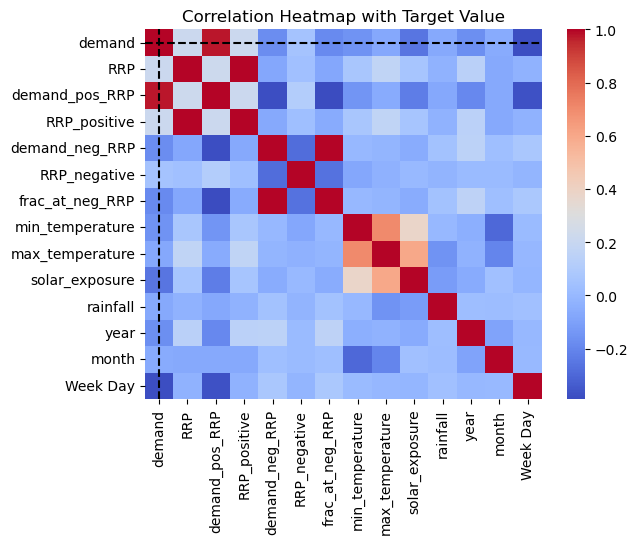

In [20]:
# Compute the correlation matrix
corr = df.corr()

# Generate a heatmap plot
sns.heatmap(corr, cmap='coolwarm')

# Set the target value
target = 0.5

# Add horizontal and vertical lines
plt.axhline(y=target, color='black', linestyle='--')
plt.axvline(x=target, color='black', linestyle='--')

# Set the plot title
plt.title('Correlation Heatmap with Target Value')

# Show the plot
plt.show()

From Heatmap, the correlation between features is not small, so there is no need to do more feature selection

/var/folders/66/48n04c4s5hn0mjggwvm66qhh0000gn/T/ipykernel_17460/4124198499.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

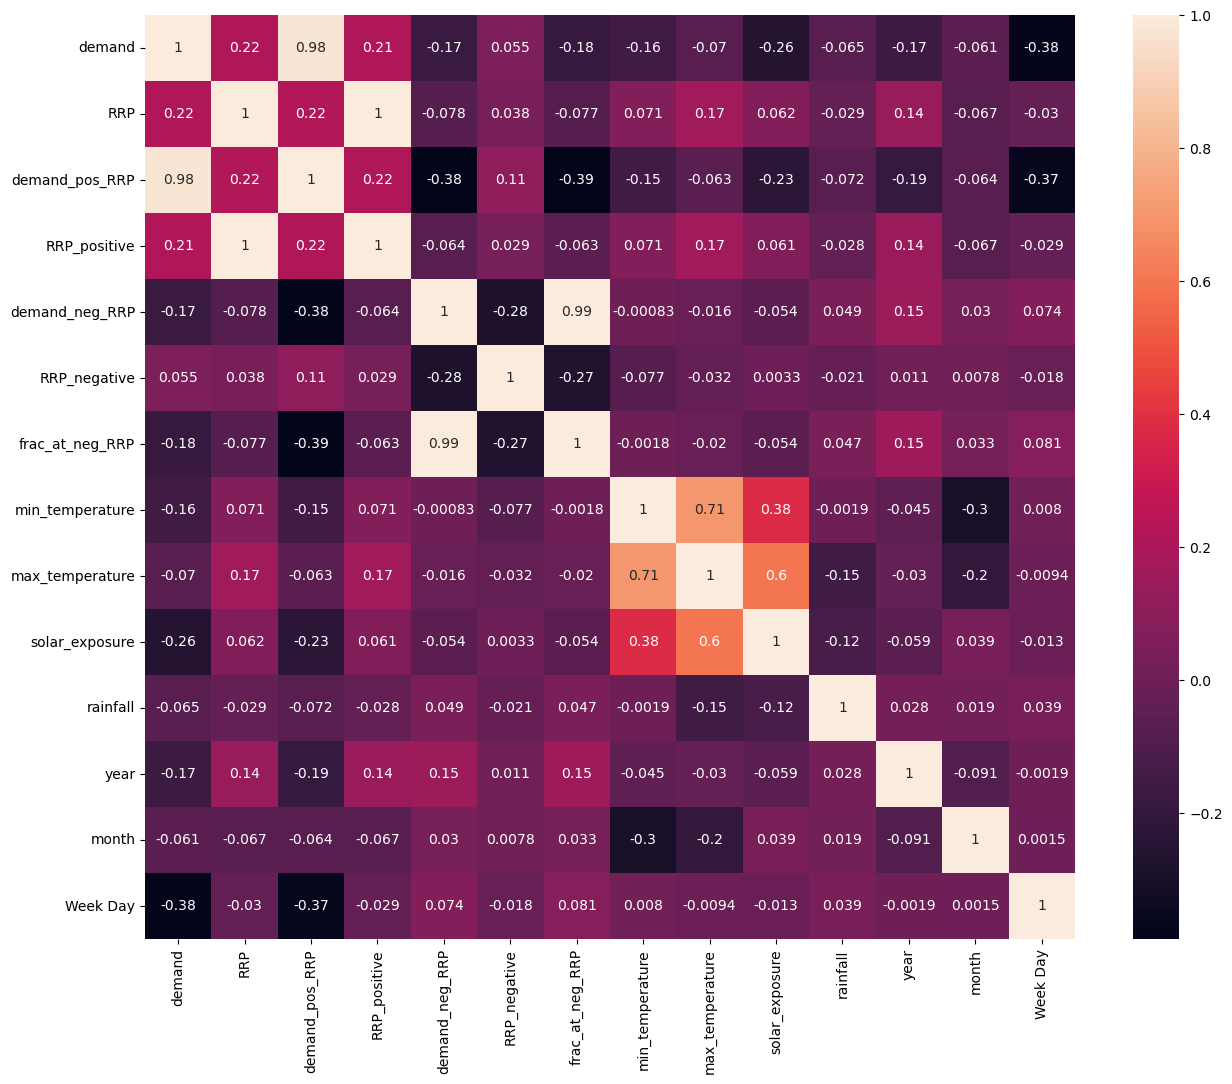

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

/var/folders/66/48n04c4s5hn0mjggwvm66qhh0000gn/T/ipykernel_17460/1991313933.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap2 = sns.heatmap(df.corr()[['demand']].sort_values(by='demand', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG') # set heatmap


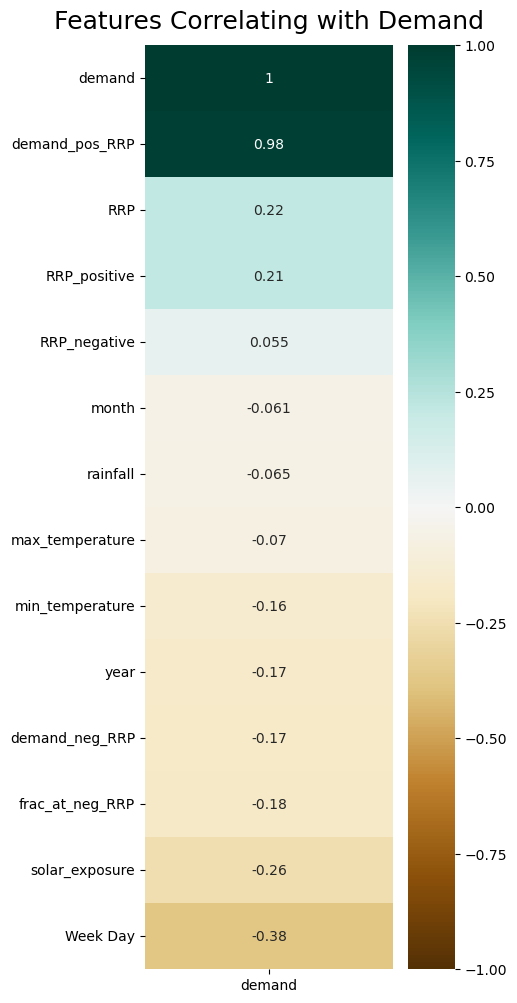

In [22]:
plt.figure(figsize=(4, 12)) # set fig size
heatmap2 = sns.heatmap(df.corr()[['demand']].sort_values(by='demand', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG') # set heatmap
heatmap2.set_title('Features Correlating with Demand', fontdict={'fontsize':18}, pad=12); # set title
# plt.savefig('heatmap2.png', dpi=300, bbox_inches='tight')

split ratios for the training, validation, and test sets： 70% for training, 15% for validation, and 15% for testing
2015 Jan - 2018 Dec (48 Months) 
2019 Jan - Dec (12 Months)
2020 Jan-Sep (9 Months)

In [23]:
# Split train-val-test
#train_start = '2015-01-01'
train_end = '2018-12-31'
val_start = '2019-01-01'
val_end =  '2019-12-31'
test_start = '2020-01-01'
# test_end = '2020-12-31'

df_train = df.loc[: train_end]
df_val   = df.loc[val_start:val_end]
df_test  = df.loc[test_start:]

print(f"Dates train      : {df_train.index.min()} --- {df_train.index.max()}  (n={len(df_train)})")
print(f"Dates validation : {df_val.index.min()} --- {df_val.index.max()}  (n={len(df_val)})")
print(f"Dates test       : {df_test.index.min()} --- {df_test.index.max()}  (n={len(df_test)})")

Dates train      : 2015-01-01 00:00:00 --- 2018-12-31 00:00:00  (n=1461)
Dates validation : 2019-01-01 00:00:00 --- 2019-12-31 00:00:00  (n=365)
Dates test       : 2020-01-01 00:00:00 --- 2020-09-30 00:00:00  (n=274)


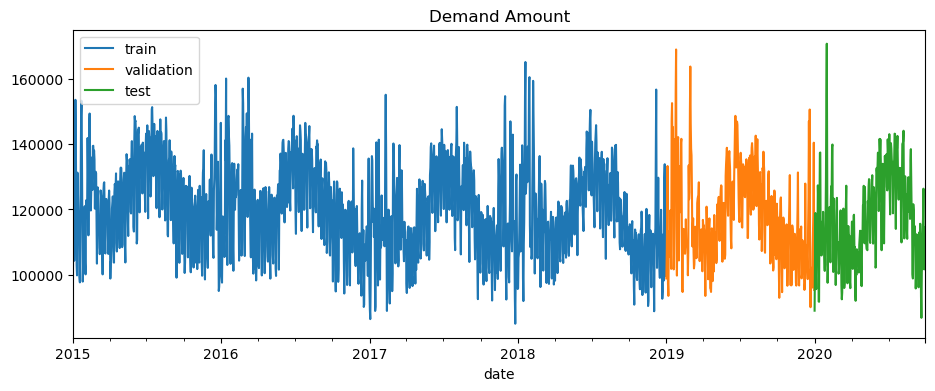

In [24]:
fig, ax = plt.subplots(figsize=(11, 4))
df_train['demand'].plot(ax=ax, label='train')
df_val['demand'].plot(ax=ax, label='validation')
df_test['demand'].plot(ax=ax, label='test')
ax.set_title('Demand Amount')
ax.legend();

In [25]:
"""#  Plot time series with zoom
# ==============================================================================
zoom = ('2015-01-01','2020-09-30')

fig = plt.figure(figsize=(11, 6))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])

df_train['demand'].plot(ax=main_ax, label='train', alpha=0.5)
df_val['demand'].plot(ax=main_ax, label='validation', alpha=0.5)
df_test['demand'].plot(ax=main_ax, label='test', alpha=0.5)
min_y = min(df['demand'])
max_y = max(df['demand'])
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
main_ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))

df.loc[zoom[0]: zoom[1]]['demand'].plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Number of demand: {df.index.min()}, {df.index.max()}', fontsize=14)
zoom_ax.set_title(f'Number of demand: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)"""

"#  Plot time series with zoom\n# ==============================================================================\nzoom = ('2015-01-01','2020-09-30')\n\nfig = plt.figure(figsize=(11, 6))\ngrid = plt.GridSpec(nrows=8, ncols=1, hspace=0.6, wspace=0)\n\nmain_ax = fig.add_subplot(grid[1:3, :])\nzoom_ax = fig.add_subplot(grid[5:, :])\n\ndf_train['demand'].plot(ax=main_ax, label='train', alpha=0.5)\ndf_val['demand'].plot(ax=main_ax, label='validation', alpha=0.5)\ndf_test['demand'].plot(ax=main_ax, label='test', alpha=0.5)\nmin_y = min(df['demand'])\nmax_y = max(df['demand'])\nmain_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)\nmain_ax.set_xlabel('')\nmain_ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))\n\ndf.loc[zoom[0]: zoom[1]]['demand'].plot(ax=zoom_ax, color='blue', linewidth=2)\n\nmain_ax.set_title(f'Number of demand: {df.index.min()}, {df.index.max()}', fontsize=14)\nzoom_ax.set_title(f'Number of demand: {zoom}', fontsize=14)\nplt.subplots

In [26]:
# Interactive plot of time series
# ==============================================================================
df.loc[:train_end, 'partition'] = 'train'
df.loc[val_start:val_end, 'partition'] = 'validation'
df.loc[test_start:, 'partition'] = 'test'

fig = px.line(
    data_frame = df.reset_index(),
    x      = 'date',
    y      = 'demand',
    color  = 'partition',
    title  = 'Demand Amount',
    width  = 900,
    height = 500
)

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.show()

data=df.drop(columns='partition')

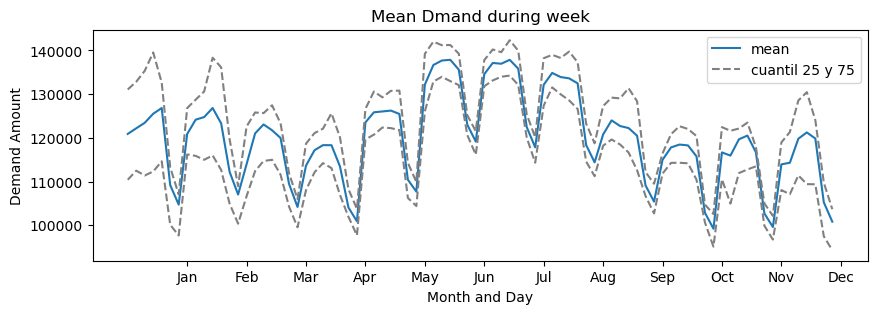

In [27]:
# Boxplot chart for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 3))
mean_month_day = df.groupby(["month", "Week Day"])["demand"].mean()
q25_dia_hora = df.groupby(["month", "Week Day"])["demand"].quantile(0.25)
q75_dia_hora = df.groupby(["month", "Week Day"])["demand"].quantile(0.75)

mean_month_day.plot(ax=ax, label='mean')
q25_dia_hora.plot(ax=ax, linestyle='dashed', color='gray', label='')
q75_dia_hora.plot(ax=ax, linestyle='dashed', color='gray', label='cuantil 25 y 75')


ax.set(
    title="Mean Dmand during week",
    xticks=[i*7 for i in range(1,13)],
    xticklabels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug","Sep","Oct","Nov","Dec"],
    xlabel="Month and Day",
    ylabel="Demand Amount"
)

ax.legend();

/Users/jinhe/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2845: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/jinhe/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning:

divide by zero encountered in divide



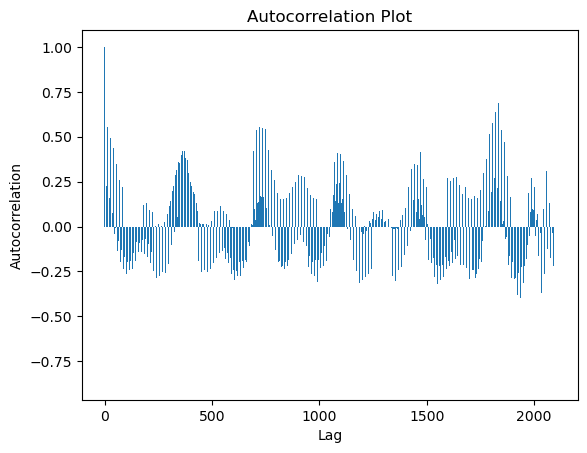

In [28]:
# Autocorrelation plot
# ==============================================================================
"""fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(data['demand'], ax=ax, lags=72)
plt.show()"""

# Compute the autocorrelation function
acf_values = [df['demand'].autocorr(lag=lag) for lag in range(len(data))]

# Create the autocorrelation plot using a bar chart
plt.bar(range(len(acf_values)), acf_values)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

/Users/jinhe/anaconda3/lib/python3.10/site-packages/numpy/lib/function_base.py:2704: RuntimeWarning:

invalid value encountered in multiply



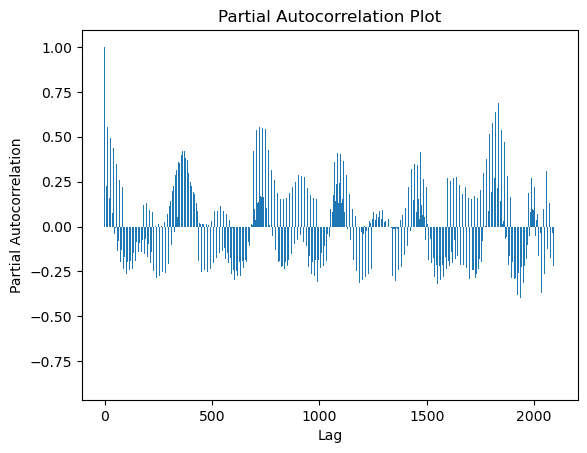

In [29]:
# Partial autocorrelation plot
# ==============================================================================
# Compute the partial autocorrelation function
def pacf(x, lag):
    if lag == 0:
        return 1.0
    else:
        x1 = x[:-lag]
        x2 = x[lag:]
        corr = np.corrcoef(x1, x2)[0][1]
        return corr

pacf_values = [pacf(data['demand'], lag) for lag in range(len(data))]

# Create the partial autocorrelation plot using a bar chart
plt.bar(range(len(pacf_values)), pacf_values)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.show()

Data transfer

In [30]:
df['school_day'] = df['school_day'].replace({'Y': 1, 'N': 0}) 
df['holiday'] = df['holiday'].replace({'Y': 1, 'N': 0})

split data

In [31]:
df_train = df.loc[:train_end]
df_val = df.loc[val_start:val_end]
df_test = df.loc[test_start:]

print(f"Dates train :{df_train.index.min()} --- {df_train.index.max()} (n={len(df_train)})")
print(f"Dates validation :{df_val.index.min()} --- {df_val.index.max()} (n={len(df_val)})")
print(f"Dates train :{df_test.index.min()} --- {df_test.index.max()} (n={len(df_test)})")

Dates train :2015-01-01 00:00:00 --- 2018-12-31 00:00:00 (n=1461)
Dates validation :2019-01-01 00:00:00 --- 2019-12-31 00:00:00 (n=365)
Dates train :2020-01-01 00:00:00 --- 2020-09-30 00:00:00 (n=274)


In [32]:
y_train = df_train['demand']
X_train = df_train.drop(['demand'], axis=1)

y_val = df_val['demand']
X_val = df_val.drop(['demand'], axis=1)

y_test = df_test['demand']
X_test = df_test.drop(['demand'], axis=1)

In [33]:
print(X_train.shape, y_train.shape, 
      X_val.shape, y_val.shape, 
      X_test.shape, y_test.shape)

(1461, 16) (1461,) (365, 16) (365,) (274, 16) (274,)


In [34]:
X_train

RRP  demand_pos_RRP  RRP_positive  demand_neg_RRP  \
date                                                                   
2015-01-01   25.633696       97319.240     26.415953        2315.790   
2015-01-02   33.138988      121082.015     38.837661        8523.995   
2015-01-03   34.564855      142300.540     34.564855           0.000   
2015-01-04   25.005560      104330.715     25.005560           0.000   
2015-01-05   26.724176      118132.200     26.724176           0.000   
...                ...             ...           ...             ...   
2018-12-27  102.310896      129749.140    102.310896           0.000   
2018-12-28  121.460719      133831.375    121.460719           0.000   
2018-12-29   91.723527      108290.110     91.723527           0.000   
2018-12-30   84.166495       99613.865     84.166495           0.000   
2018-12-31   84.897997      103381.915     84.897997           0.000   

            RRP_negative  frac_at_neg_RRP  min_temperature  max_temperature  \
date                                                                          
2015-01-01     -7.240000         0.020833             13.3             26.9   
2015-01-02    -47.809777         0.062500             15.4             38.8   
2015-01-03      0.000000         0.000000             20.0             38.2   
2015-01-04      0.000000         0.000000             16.3             21.4   
2015-01-05      0.000000         0.000000             15.0             22.0   
...                  ...              ...              ...              ...   
2018-12-27      0.000000         0.000000             16.2             37.4   
2018-12-28      0.000000         0.000000             21.9             36.4   
2018-12-29      0.000000         0.000000             21.0             23.9   
2018-12-30      0.000000         0.000000             18.2             22.7   
2018-12-31      0.000000         0.000000             17.3             23.5   

            solar_exposure  rainfall  school_day  holiday  year  month  \
date                                                                     
2015-01-01            23.6       0.0           0        1  2015      1   
2015-01-02            26.8       0.0           0        0  2015      1   
2015-01-03            26.5       0.0           0        0  2015      1   
2015-01-04            25.2       4.2           0        0  2015      1   
2015-01-05            30.7       0.0           0        0  2015      1   
...                    ...       ...         ...      ...   ...    ...   
2018-12-27            29.3       0.0           0        0  2018     12   
2018-12-28            19.1       0.0           0        0  2018     12   
2018-12-29             5.7       1.2           0        0  2018     12   
2018-12-30             9.9       0.6           0        0  2018     12   
2018-12-31            31.3       0.8           0        0  2018     12   

            Week Day partition  
date                            
2015-01-01         4     train  
2015-01-02         5     train  
2015-01-03         6     train  
2015-01-04         7     train  
2015-01-05         1     train  
...              ...       ...  
2018-12-27         4     train  
2018-12-28         5     train  
2018-12-29         6     train  
2018-12-30         7     train  
2018-12-31         1     train  

[1461 rows x 16 columns]

delete the extra column

In [35]:
df_train = df_train.drop('partition', axis=1)

In [36]:
y_train = df_train['demand']
X_train = df_train.drop(['demand'], axis=1)

y_val = df_val['demand']
X_val = df_val.drop(['demand'], axis=1)

y_test = df_test['demand']
X_test = df_test.drop(['demand'], axis=1)

In [37]:
X_train

RRP  demand_pos_RRP  RRP_positive  demand_neg_RRP  \
date                                                                   
2015-01-01   25.633696       97319.240     26.415953        2315.790   
2015-01-02   33.138988      121082.015     38.837661        8523.995   
2015-01-03   34.564855      142300.540     34.564855           0.000   
2015-01-04   25.005560      104330.715     25.005560           0.000   
2015-01-05   26.724176      118132.200     26.724176           0.000   
...                ...             ...           ...             ...   
2018-12-27  102.310896      129749.140    102.310896           0.000   
2018-12-28  121.460719      133831.375    121.460719           0.000   
2018-12-29   91.723527      108290.110     91.723527           0.000   
2018-12-30   84.166495       99613.865     84.166495           0.000   
2018-12-31   84.897997      103381.915     84.897997           0.000   

            RRP_negative  frac_at_neg_RRP  min_temperature  max_temperature  \
date                                                                          
2015-01-01     -7.240000         0.020833             13.3             26.9   
2015-01-02    -47.809777         0.062500             15.4             38.8   
2015-01-03      0.000000         0.000000             20.0             38.2   
2015-01-04      0.000000         0.000000             16.3             21.4   
2015-01-05      0.000000         0.000000             15.0             22.0   
...                  ...              ...              ...              ...   
2018-12-27      0.000000         0.000000             16.2             37.4   
2018-12-28      0.000000         0.000000             21.9             36.4   
2018-12-29      0.000000         0.000000             21.0             23.9   
2018-12-30      0.000000         0.000000             18.2             22.7   
2018-12-31      0.000000         0.000000             17.3             23.5   

            solar_exposure  rainfall  school_day  holiday  year  month  \
date                                                                     
2015-01-01            23.6       0.0           0        1  2015      1   
2015-01-02            26.8       0.0           0        0  2015      1   
2015-01-03            26.5       0.0           0        0  2015      1   
2015-01-04            25.2       4.2           0        0  2015      1   
2015-01-05            30.7       0.0           0        0  2015      1   
...                    ...       ...         ...      ...   ...    ...   
2018-12-27            29.3       0.0           0        0  2018     12   
2018-12-28            19.1       0.0           0        0  2018     12   
2018-12-29             5.7       1.2           0        0  2018     12   
2018-12-30             9.9       0.6           0        0  2018     12   
2018-12-31            31.3       0.8           0        0  2018     12   

            Week Day  
date                  
2015-01-01         4  
2015-01-02         5  
2015-01-03         6  
2015-01-04         7  
2015-01-05         1  
...              ...  
2018-12-27         4  
2018-12-28         5  
2018-12-29         6  
2018-12-30         7  
2018-12-31         1  

[1461 rows x 15 columns]

In [38]:
y_train

date
2015-01-01     99635.030
2015-01-02    129606.010
2015-01-03    142300.540
2015-01-04    104330.715
2015-01-05    118132.200
                 ...    
2018-12-27    129749.140
2018-12-28    133831.375
2018-12-29    108290.110
2018-12-30     99613.865
2018-12-31    103381.915
Name: demand, Length: 1461, dtype: float64

techinical approach change：use Mean Squared Error (MSE), Mean Absolute Error (MAE) & R-squared to evaluate (instead of ROC curve and classification report in the plan)because we are using continuous data not classification.
note:MSE，MAE - the lower the better. R square 0-1 the higher the better

Build model - SVM

In [39]:
X_test = X_test.drop('partition', axis=1)

In [40]:
from sklearn.svm import SVR

In [41]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [43]:
SVR_model = SVR()
parameters = {}
cross_validation = 5 
grid_search_SVR = GridSearchCV(SVR_model, param_grid=parameters, cv=cross_validation)
grid_search_SVR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), param_grid={})

In [44]:
print("Best param:", grid_search_SVR.best_params_)

Best param: {}


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = grid_search_SVR.predict(X_train)
print("MSE_SVM:", mean_squared_error(y_train, y_pred))
print("MAE_SVM:", mean_absolute_error(y_train, y_pred))
print("R2_SVM:", r2_score(y_train, y_pred))

MSE_SVM: 185027497.5202938
MAE_SVM: 11041.368732380382
R2_SVM: 0.002603671156187537


Not fit! because SVM is suitable for classification problem

Linear regression

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
np.random.seed(12345)
X_train1 = np.random.rand(1461, 15)
coefficients = np.random.rand(15, 1)
noise = 0.1 * np.random.randn(1461, 1)
y_train1 = X_train1.dot(coefficients) + noise

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train1, y_train1)

LinearRegression()

In [50]:
y_pred1 = lr.predict(X_test)

/Users/jinhe/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

In [53]:
print("MSE_LR:", mse)
print("MAE_LR:", mae)
print("R2_LR:", r2)

MSE_LR: 1939116322.566092
MAE_LR: 43746.37894313581
R2_LR: -9.665286334881975


not fit！because LR suits the single up or down trend, our data has many peaks and troughs

Decision tree

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeRegressor

In [55]:
decision_tree_regressor = DecisionTreeRegressor()

In [56]:
skf = StratifiedKFold(n_splits=10)

In [57]:
cross_validation = skf.get_n_splits(X_train, y_train)

In [58]:
parameter_grid = {'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': range(1, 10)}
grid_search_decisiontree = GridSearchCV(decision_tree_regressor, param_grid=parameter_grid, cv=cross_validation)
grid_search_decisiontree.fit(X_train, y_train)

/Users/jinhe/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jinhe/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jinhe/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/jinhe/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/Users/jinhe/anaconda3/lib/

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': range(1, 10)})

In [59]:
print("Best score:", grid_search_decisiontree.best_score_)
print("Best param:", grid_search_decisiontree.best_params_)

Best score: 0.9900801707623561
Best param: {'criterion': 'friedman_mse', 'max_depth': 9}


In [60]:
grid_search_decisiontree.best_estimator_.predict(X_train)

array([ 99109.26      , 129606.01      , 142290.11916667, ...,
       108191.706     ,  99382.78875   , 103560.69285714])

In [61]:
y_pred2 = grid_search_decisiontree.predict(X_test)

print("MSE_DT:", mean_squared_error(y_test, y_pred2))
print("MAE_DT:", mean_absolute_error(y_test, y_pred2))
print("R2_DT:", r2_score(y_test, y_pred2))

MSE_DT: 15698967.916277656
MAE_DT: 1379.0693319265733
R2_DT: 0.9136544899133971


Performs well! R-squared = 0.90

Try more models: XGBoost - ensemble learning method, expanded DT

XGboost

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
import xgboost as xgb

In [ ]:
xgb_model = xgb.XGBRegressor()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [0.1, 0.3, 0.5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'reg_alpha': [0.1, 0.3, 0.5],
    'reg_lambda': [0.1, 0.3, 0.5],}

xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=parameters, cv=3, verbose=3, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

In [68]:
print(xgb_grid.best_params_)

{'colsample_bytree': 0.9, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0.3, 'reg_lambda': 0.5, 'subsample': 0.5}


It runs slow due to too many parameters

Next, use the best params to do prediction

In [69]:
xgb_model = xgb.XGBRegressor(**xgb_grid.best_params_)

xgb_model.fit(X_train, y_train)
predict_data = xgb_model.predict(X_test)

In [70]:
y_pred3 = xgb_model.predict(X_test)
print("MSE_X:", mean_squared_error(y_test, y_pred3))
print("MAE_X:", mean_absolute_error(y_test, y_pred3))
print("R2_X:", r2_score(y_test, y_pred3))

MSE_X: 1973181.8588937796
MAE_X: 599.4386028740864
R2_X: 0.9891473506406011


XGboost Amazing！

Draw a graph showing the comparasion of predicted & actual values

In [71]:
import numpy as np
import matplotlib.pyplot as plt

num_future_points = 274
future_input_features = np.random.rand(num_future_points, 15)
dates = pd.date_range(start='2020-01-01', end='2020-09-30', freq='D')

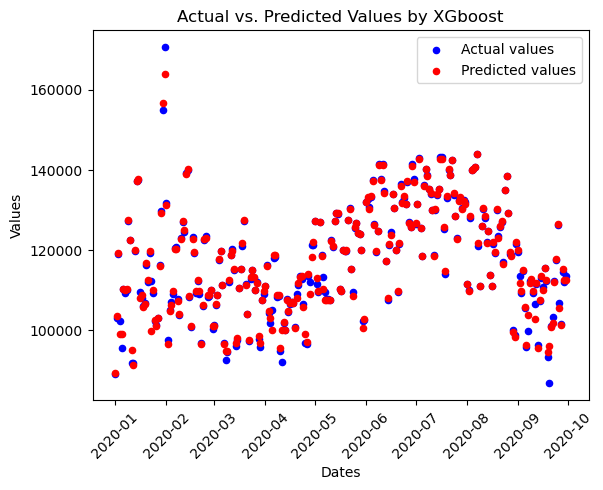

In [72]:
plt.scatter(dates, y_test, color='blue', label='Actual values', s=20)
plt.scatter(dates, y_pred3, color='red', label='Predicted values', s=20)

plt.legend(loc='best')
plt.xlabel('Dates')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values by XGboost')

plt.xticks(rotation=45)
plt.show()

Lot of overlap areas, and same trand, satisfying result :)

Use AutoML to check if any better models 

In [76]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

  Using cached lightgbm-3.3.5.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [86 lines of output]
      INFO:root:running bdist_wheel
      /Users/jinhe/anaconda3/lib/python3.10/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      INFO:root:running build
      INFO:root:running build_py
      INFO:root:creating build
      INFO:root:creating build/lib
      INFO:root:creating build/lib/lightgbm
      INFO:root:copying lightgbm/callback.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/compat.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/plotting.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/__init__.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/engine.py -> build/lib/lightgbm
  

Failed to build lightgbm
ERROR: Could not build wheels for lightgbm, which is required to install pyproject.toml-based projects
Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install flaml

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - flaml

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1]:
from flaml import AutoML

ModuleNotFoundError: No module named 'flaml'

In [ ]:
automl = AutoML()
settings = {

"metric": 'r2', # could be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
"task": 'regression', 
}

In [ ]:
automl.fit(X_train, y_train,**settings)

In [ ]:
y_pred4 = automl.predict(X_test)
print("MSE_Auto:", mean_squared_error(y_test, y_pred4))
print("MAE_Auto:", mean_absolute_error(y_test, y_pred4))
print("R2_Auto:", r2_score(y_test, y_pred4))

Similar to XGboost

Make a table combined the evaluation of all models

In [ ]:
MSE_SVM = 185027497.5202938
MAE_SVM = 11041.368732380382
R2_SVM = 0.002603671156187537

MSE_LR = 1939116322.566078
MAE_LR = 43746.37894313565
R2_LR = -9.665286334881898
    
MSE_DT = 17465187.932508264
MAE_DT = 1549.4678927103741
R2_DT = 0.9039401463310733
    
MSE_X = 1973181.8588937796
MAE_X = 599.4386028740864
R2_X = 0.9891473506406011

MSE_Auto = 2688935.3538972368
MAE_Auto = 582.758550410585
R2_Auto = 0.985210652320563

metrics = {
    'SVM': {'Mean Squared Error': f'{MSE_SVM:.4f}', 'Mean Absolute Error': f'{MAE_SVM:.4f}', 'R-squared': f'{R2_SVM:.4f}'},
    'Linear Regression': {'Mean Squared Error': f'{MSE_LR:.4f}', 'Mean Absolute Error': f'{MAE_LR:.4f}', 'R-squared': f'{R2_LR:.4f}'},
    'Decision Tree': {'Mean Squared Error': f'{MSE_DT:.4f}', 'Mean Absolute Error': f'{MAE_DT:.4f}', 'R-squared': f'{R2_DT:.4f}'},
    'XGBoost': {'Mean Squared Error': f'{MSE_X:.4f}', 'Mean Absolute Error': f'{MAE_X:.4f}', 'R-squared': f'{R2_X:.4f}'},
    'AutoML': {'Mean Squared Error': f'{MSE_Auto:.4f}', 'Mean Absolute Error': f'{MAE_Auto:.4f}', 'R-squared': f'{R2_Auto:.4f}'}
}

In [ ]:
table = pd.DataFrame(metrics)
display(table)

XGBoost is the best, similar with AutoML, with low MAE and high R2. 
Decision Tree is good but not as good as those two. 
SVM & LR not fit. Reasons mentioned before. 

Save Xboost model for future use (It's in the same folder of this doc)

In [ ]:
import pickle
pickle.dump(xgb_model, open('xgb_model.pkl', 'wb'))

Load and use the model

In [ ]:
xgb_model = pickle.load(open('xgb_model.pkl', 'rb'))
y_pred = xgb_model.predict(X_test)

[CV 2/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.3, subsample=0.7;, score=0.995 total time=   0.1s
[CV 3/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.5, reg_lambda=0.3, subsample=0.7;, score=0.993 total time=   0.1s
[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.5, subsample=0.9;, score=0.997 total time=   0.1s
[CV 2/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.5, subsample=0.9;, score=0.996 total time=   0.1s
[CV 3/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.5, subsample=0.9;, score=0.993 total time=   0.1s
[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.3, reg_lambda=0.1, sub

[CV 2/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=100, reg_alpha=0.3, reg_lambda=0.5, subsample=0.9;, score=0.995 total time=   0.1s
[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5;, score=0.997 total time=   0.1s
[CV 2/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5;, score=0.996 total time=   0.1s
[CV 3/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.1, subsample=0.5;, score=0.993 total time=   0.1s
[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.1, reg_lambda=0.1, subsample=0.7;, score=0.997 total time=   0.1s
[CV 3/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=3, n_estimators=150, reg_alpha=0.3, reg_lambda=0.1, sub

[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.3, subsample=0.9;, score=0.989 total time=   0.1s
[CV 2/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.3, subsample=0.9;, score=0.991 total time=   0.1s
[CV 3/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.3, subsample=0.9;, score=0.989 total time=   0.1s
[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5;, score=0.985 total time=   0.1s
[CV 1/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.3, reg_lambda=0.5, subsample=0.9;, score=0.989 total time=   0.0s
[CV 2/3] END colsample_bytree=0.9, gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=50, reg_alpha=0.3, reg_lambda=0.5, subsample